In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import fpfs
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

ver='try2'
gver='basic2'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

0.6991673601211388


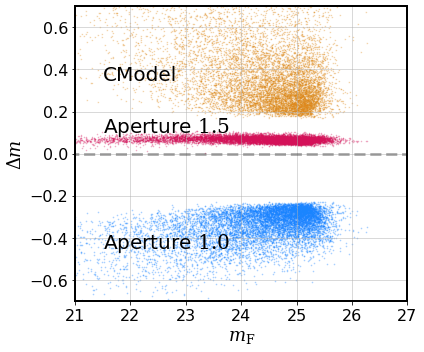

In [10]:
def flux2mag(flux):
    return -2.5 * np.log10(flux) + 27.
nver='var1em9' # 'var0em0'# 'var1em9'
hdat=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/src-0000-g1-0000.fits' %(gver,nver,ver)))
fdat=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-0000-g1-0000.fits' %(gver,nver,ver,dver)))
hdat=hdat[hdat['parent']==0]
ipos1=np.int_((hdat['base_NaiveCentroid_y']//64*100)+hdat['base_NaiveCentroid_x']//64)
ipos2=np.int_((fdat['fpfs_y']//64*100)+fdat['fpfs_x']//64)
assert np.all(ipos2==np.arange(10000))
fdat=fdat[ipos1]

size=0.5
alpha=0.3
pix_scale=1.

plt.close()
fig,axes=pltutil.make_figure_axes(ny=1,nx=1,square=False)

#mf   =   flux2mag(fdat['fpfs_M00']/(pix_scale)**2.)
ma1  =   flux2mag(hdat['base_CircularApertureFlux_3_0_instFlux'])
ma2  =   flux2mag(hdat['base_CircularApertureFlux_4_5_instFlux'])
mc   =   flux2mag(hdat['modelfit_CModel_instFlux'])
mf  =   flux2mag(fdat['fpfs_M00']*1.904)

ax=axes[0]
ax.scatter(mf,mf-ma1,marker='o',s=size,color=pltutil.colors0[1],alpha=alpha)
ax.text(21.5,-0.45,'Aperture $1.0$',fontsize=20)
ax.scatter(mf,mf-ma2,marker='*',s=size,color=pltutil.colors0[2],alpha=alpha)
ax.text(21.5,0.10,'Aperture $1.5$',fontsize=20)
ax.scatter(mf,mf-mc,marker='>',s=size,color=pltutil.colors0[3],alpha=alpha)
ax.text(21.5,0.35,'CModel',fontsize=20)
x=np.linspace(20,28,100)
dm=2.5 * np.log10(1.904)
ax.plot(x,0.*np.ones(100),ls='--',alpha=alpha,color='black',linewidth=3.)
print(dm)
#x=np.linspace(0,20,100)
#ax.plot(x,x,'-',color='black',alpha=0.6)
ax.set_xlabel(r'$m_{\rm F}$')
ax.set_ylabel(r'$\Delta m$')
ax.set_xlim(21,27)
ax.set_ylim(-0.7,0.7)
ax.grid()

#leg=ax.legend(fontsize=18,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
#for it,text in enumerate(leg.get_texts()):
#    text.set_color(pltutil.colors0[it+1])

#ax=axes[1]
#ax.scatter((fdat['fpfs_M00']+fdat['fpfs_M20'])/0.168**2.,hdat['ext_shapeHSM_HsmSourceMoments_xx']+hdat['ext_shapeHSM_HsmSourceMoments_yy'],\
#           s=0.04,color=pltutil.colors[1],alpha=0.1)
#ax.set_xlabel('fpfs trace')
#ax.set_ylabel('regauss trace')
#ax.set_xlim(-1,40)
#ax.set_ylim(-1,40)
fig.tight_layout()
fig.savefig('compare_mags.pdf')

In [11]:
-2.5 * np.log10(1.905)

-0.6997374500290953